In [1]:
#Final Version HW6

import json
import requests as req
import random
import seaborn as sns
import pandas as pd
import math as math
import time
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy


In [2]:
# Latitude and longitude zones 
lat_zone = np.arange(-90, 90, 10)
lon_zone = np.arange(-180, 180, 10)

# Creating df
cities_df = pd.DataFrame()

# Columns for df 
cities_df["Latitude"] = ""
cities_df["Longitude"] = ""
cities_df["City"] = ""
cities_df["Country"] = ""

# Create 'for' loop 
for coord_lat in lat_zone:
    
    for coord_lon in lon_zone:
        # Get list of latitude and longitude values (0.01 for value to 2 decimal places)
        lat_values = list(np.arange(coord_lat, coord_lat + 15, 0.01))
        lon_values = list(np.arange(coord_lon, coord_lon + 15, 0.01))
        
        random_lats = random.sample(lat_values, 50)
        random_lons = random.sample(lon_values, 50)
        
        lat_samples = [coord_lat + lat for lat in random_lats]
        lon_samples = [coord_lon + lon for lon in random_lons]
        
        cities_df = cities_df.append(pd.DataFrame.from_dict({
            "Latitude": lat_samples, 
            "Longitude": lon_samples}))

cities_df = cities_df.reset_index(drop=True)
cities_df.head()

/Users/DocsMac/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


,City,Country,Latitude,Longitude
0,NaN,NaN,-176.66,-348.45
1,NaN,NaN,-175.38,-351.56
2,NaN,NaN,-178.80,-349.75
3,NaN,NaN,-174.64,-347.09
4,NaN,NaN,-175.71,-350.91


In [3]:
# Use 'for' loop to locate the neareast city based on latitude and longitude stored in dataframe
for column, row in cities_df.iterrows():
    city = citipy.nearest_city(row["Latitude"], row["Longitude"])
    cities_df.set_value(column, "City", city.city_name)
    cities_df.set_value(column, "Country", city.country_code)

new_cities_df = cities_df.drop(["Latitude", "Longitude"], axis=1)

new_cities_df = new_cities_df.drop_duplicates()
new_cities_df.head()

/Users/DocsMac/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.
/Users/DocsMac/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """


,City,Country
0,vaini,to
450,mataura,pf
500,punta arenas,cl
518,ushuaia,ar
901,bredasdorp,za


In [4]:
# 500 random cities
random_cities_df = new_cities_df.sample(500)

# Reseting index
random_cities_df = random_cities_df.reset_index(drop=True)
random_cities_df.head()

,City,Country
0,wamba,cd
1,ketchikan,us
2,mizur,ru
3,caxito,ao
4,sesheke,zm


In [5]:
# Save 
url = "http://api.openweathermap.org/data/2.5/weather"

params = {"appid": "2ec88724f3fad131ccffe1dfb2efab45",
          "units": "metric"}

# 'for' loop 
for column, row in random_cities_df.iterrows():
    
    # Reference rows for 'q' param
    params["q"] = f'{row["City"]}, {row["Country"]}'
    
    # Get and print links for each city
    print(f'Weather information for {params["q"]}')
    weather_response = req.get(url, params)
    print(weather_response.url)
    weather_response  = weather_response.json()
    
    # Get weather data and input into df
    random_cities_df.set_value(column, "Latitude", weather_response.get("coord", {}).get("lat"))
    random_cities_df.set_value(column, "Longitude", weather_response.get("coord", {}).get("lon"))
    random_cities_df.set_value(column, "Temperature", weather_response.get("main", {}).get("temp_max"))
    random_cities_df.set_value(column, "Wind Speed", weather_response.get("wind", {}).get("speed"))
    random_cities_df.set_value(column, "Humidity", weather_response.get("main", {}).get("humidity"))
    random_cities_df.set_value(column, "Cloudiness", weather_response.get("clouds", {}).get("all"))

Weather information for wamba, cd
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=wamba%2C+cd
Weather information for ketchikan, us
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=ketchikan%2C+us
Weather information for mizur, ru


/Users/DocsMac/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/DocsMac/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/DocsMac/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/DocsMac/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/DocsMac/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[

http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=mizur%2C+ru
Weather information for caxito, ao
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=caxito%2C+ao
Weather information for sesheke, zm
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=sesheke%2C+zm
Weather information for jamame, so
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=jamame%2C+so
Weather information for ankpa, ng
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=ankpa%2C+ng
Weather information for shaunavon, ca
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=shaunavon%2C+ca
Weather information for lata, sb
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=la

http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=marinette%2C+us
Weather information for sujiatun, cn
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=sujiatun%2C+cn
Weather information for ushuaia, ar
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=ushuaia%2C+ar
Weather information for carauari, br
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=carauari%2C+br
Weather information for mosjoen, no
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=mosjoen%2C+no
Weather information for burica, pa
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=burica%2C+pa
Weather information for linxia, cn
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units

http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=rajbiraj%2C+np
Weather information for pasni, pk
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=pasni%2C+pk
Weather information for san cristobal, ec
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=san+cristobal%2C+ec
Weather information for newburyport, us
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=newburyport%2C+us
Weather information for thompson, ca
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=thompson%2C+ca
Weather information for harwich, us
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=harwich%2C+us
Weather information for bitung, id
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1d

http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=zmeinogorsk%2C+ru
Weather information for cervo, es
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=cervo%2C+es
Weather information for nouadhibou, mr
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=nouadhibou%2C+mr
Weather information for scarborough, tt
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=scarborough%2C+tt
Weather information for nicoya, cr
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=nicoya%2C+cr
Weather information for bredasdorp, za
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=bredasdorp%2C+za
Weather information for pocone, br
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1df

http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=carmen%2C+mx
Weather information for kapit, my
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=kapit%2C+my
Weather information for simao, cn
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=simao%2C+cn
Weather information for kalianget, id
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=kalianget%2C+id
Weather information for yen bai, vn
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=yen+bai%2C+vn
Weather information for barawe, so
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=barawe%2C+so
Weather information for noumea, nc
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=n

http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=champerico%2C+gt
Weather information for la rioja, ar
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=la+rioja%2C+ar
Weather information for oussouye, sn
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=oussouye%2C+sn
Weather information for yaring, th
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=yaring%2C+th
Weather information for wiwili, ni
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=wiwili%2C+ni
Weather information for khandbari, np
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=khandbari%2C+np
Weather information for lagos, ng
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&uni

http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=san+quintin%2C+mx
Weather information for camana, pe
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=camana%2C+pe
Weather information for vung tau, vn
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=vung+tau%2C+vn
Weather information for shobara, jp
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=shobara%2C+jp
Weather information for sindou, bf
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=sindou%2C+bf
Weather information for senneterre, ca
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=senneterre%2C+ca
Weather information for caravelas, br
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab4

http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=arrecife%2C+es
Weather information for nuqui, co
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=nuqui%2C+co
Weather information for hyeres, fr
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=hyeres%2C+fr
Weather information for zhanjiang, cn
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=zhanjiang%2C+cn
Weather information for condega, ni
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=condega%2C+ni
Weather information for dalkola, in
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=dalkola%2C+in
Weather information for kautokeino, no
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=

http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=newark%2C+us
Weather information for turochak, ru
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=turochak%2C+ru
Weather information for foumban, cm
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=foumban%2C+cm
Weather information for cassilandia, br
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=cassilandia%2C+br
Weather information for rocky mountain house, ca
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=rocky+mountain+house%2C+ca
Weather information for yarim, ye
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=yarim%2C+ye
Weather information for nuuk, gl
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad

http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=itaporanga%2C+br
Weather information for tiznit, ma
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=tiznit%2C+ma
Weather information for hammerfest, no
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=hammerfest%2C+no
Weather information for am timan, td
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=am+timan%2C+td
Weather information for afikpo, ng
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=afikpo%2C+ng
Weather information for isiro, cd
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=isiro%2C+cd
Weather information for mehran, ir
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=

In [6]:
# Display df
random_cities_df

# Remove cities without any data 
new_random_cities_df = random_cities_df.dropna()
new_random_cities_df.head()

,City,Country,Latitude,Longitude,Temperature,Wind Speed,Humidity,Cloudiness
0,wamba,cd,2.14,27.99,19.20,1.06,95.0,0.0
1,ketchikan,us,55.34,-131.65,13.90,3.10,77.0,1.0
2,mizur,ru,42.85,44.06,4.05,0.81,84.0,8.0
3,caxito,ao,-8.58,13.66,22.00,2.60,88.0,75.0
4,sesheke,zm,-17.48,24.30,16.00,3.11,77.0,0.0


In [7]:
new_random_cities_df.to_csv("WeatherInfoByWorldCities.csv")


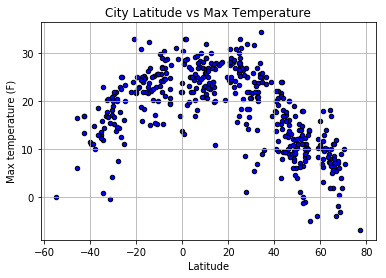

In [8]:
# Plot Temperature (F) vs. Latitude
temp_vs_lat = new_random_cities_df.plot(kind="scatter",
                                        x="Latitude",
                                        y="Temperature",
                                        color="blue",
                                        edgecolor="black",
                                        grid=True)
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max temperature (F)")
plt.savefig("LatVsTemp.png")
plt.show()

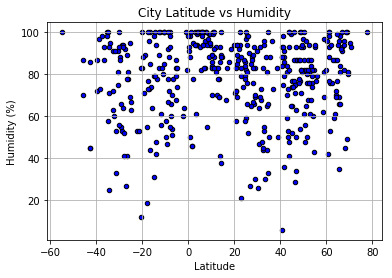

In [9]:
# Plot Humidity (%) vs. Latitude
humid_vs_lat = new_random_cities_df.plot(kind="scatter",
                                         x="Latitude",
                                         y="Humidity",
                                         color="blue",
                                         edgecolor="black",
                                         grid=True)
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("LatVsHumidity.png")
plt.show()

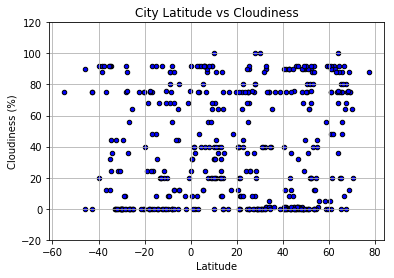

In [10]:
# Plot Cloudiness (%) vs. Latitude
cloud_vs_lat = new_random_cities_df.plot(kind="scatter",
                                         x="Latitude",
                                         y="Cloudiness",
                                         color="blue",
                                         edgecolor="black",
                                         grid=True)
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-20, 120)
plt.savefig("LatVsCloudiness.png")
plt.show()

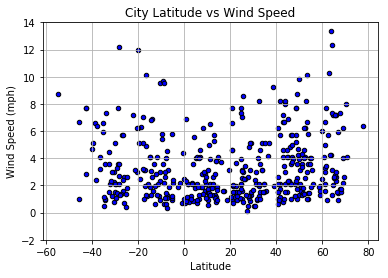

In [11]:
# Plot Wind Speed (mph) vs. Latitude
windspeed_vs_lat = new_random_cities_df.plot(kind="scatter",
                                         x="Latitude",
                                         y="Wind Speed",
                                         color="blue",
                                         edgecolor="black",
                                         grid=True)
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2, 14)
plt.savefig("LatVsWindSpeed.png")
plt.show()